In [2]:
%load_ext autoreload
%autoreload 2

# Calculate the b-factor on ECCO4v4

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import numpy as np
import xarray as xr
from xgcm import Grid
import glob

In [17]:
rootdir = '/data2/project/ECCO4v4/'
# neutral density
localdir = 'GAMMAN/*/'
filename = 'GAMMAN_*.nc'
gamma = xr.open_mfdataset(rootdir+localdir+filename).drop(['XC','YC','Z','timestep','time_bnds'])

In [12]:
def add_tile(ds):
    file = ds.encoding["source"]
    ntile = np.array([int(file[-5:-3])-1])
    return ds.expand_dims({'tile':ntile})
# grid data
localdir = 'nctiles_grid/'
filename = 'GRID.*.nc'
grid = xr.open_mfdataset(rootdir+localdir+filename,preprocess=add_tile)
grid = grid.rename({'i1':'k','i2':'j','i3':'i'})

In [13]:
grid

<xarray.Dataset>
Dimensions:  (i: 90, j: 90, k: 50, tile: 13)
Coordinates:
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * k        (k) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 46.0 47.0 48.0 49.0 50.0
  * j        (j) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
  * i        (i) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 86.0 87.0 88.0 89.0 90.0
Data variables:
    hFacC    (tile, k, j, i) float64 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    hFacW    (tile, k, j, i) float64 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    hFacS    (tile, k, j, i) float64 dask.array<chunksize=(1, 50, 90, 90), meta=np.ndarray>
    XC       (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YC       (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    XG       (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    YG       (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    RAC      (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    RAZ      (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    DXC      (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    DYC      (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    DXG      (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    DYG      (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    Depth    (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    AngleCS  (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    AngleSN  (tile, j, i) float64 dask.array<chunksize=(1, 90, 90), meta=np.ndarray>
    RC       (tile, k) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
    RF       (tile, k) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
    DRC      (tile, k) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
    DRF      (tile, k) float64 dask.array<chunksize=(1, 50), meta=np.ndarray>
Attributes:
    description:    C-grid parameters (see MITgcm documentation for details)....
    A:              estimate source : Gael Forget, MIT/AER/JPL ECCO-Productio...
    B:              support contact : ecco@ocean.mit.edu
    C:              
    D:              internal code : r4it11
    E:              estimate revision history :
    F:                 r4it11   : reduce background vertical viscosity
    G:                 r4it10   : cleanup control vector adjustments
    H:                 r4it9    : optim. global mean sea level alone
    I:                 r4it0-8  : full adjoint iterations, omitting
    J:                   global mean sea level altimetry constraint.
    K:              files revision history :
    L:                 2014/02/04 : initial release of ECCO v4 (GF)
    M:                   - domain decomposed in 90x90 tiles (13 of them)
    N:                   - CF-1.6 ncetcdf files (using write\_nctiles.m)
    O:              file created using gcmfaces_IO/write2nctiles.m
    date:           20-Jan-2015
    Conventions:    CF-1.6
    _FillValue:     nan
    missing_value:  nan

In [14]:
ds = xr.merge([gamma,grid]).rename({'tile':'face'})

/home/gmacgilchrist/miniconda3/envs/wmt_bgc/lib/python3.8/site-packages/dask/array/core.py:4028: PerformanceWarning: Increasing number of chunks by factor of 52
  result = blockwise(
/home/gmacgilchrist/miniconda3/envs/wmt_bgc/lib/python3.8/site-packages/dask/array/core.py:4028: PerformanceWarning: Increasing number of chunks by factor of 51
  result = blockwise(
/home/gmacgilchrist/miniconda3/envs/wmt_bgc/lib/python3.8/site-packages/dask/array/core.py:4028: PerformanceWarning: Increasing number of chunks by factor of 50
  result = blockwise(


In [8]:
# define the connectivity between faces
face_connections = {'face':
                    {0: {'X': ((12, 'Y', False), (3, 'X', False)),
                         'Y': (None, (1, 'Y', False))}, 
                     1: {'X': ((11, 'Y', False), (4, 'X', False)),
                         'Y': ((0, 'Y', False), (2, 'Y', False))}, 
                     2: {'X': ((10, 'Y', False), (5, 'X', False)),
                         'Y': ((1, 'Y', False), (6, 'X', False))}, 
                     3: {'X': ((0, 'X', False), (9, 'Y', False)),
                         'Y': (None, (4, 'Y', False))}, 
                     4: {'X': ((1, 'X', False), (8, 'Y', False)),
                         'Y': ((3, 'Y', False), (5, 'Y', False))}, 
                     5: {'X': ((2, 'X', False), (7, 'Y', False)),
                         'Y': ((4, 'Y', False), (6, 'Y', False))}, 
                     6: {'X': ((2, 'Y', False), (7, 'X', False)),
                         'Y': ((5, 'Y', False), (10, 'X', False))}, 
                     7: {'X': ((6, 'X', False), (8, 'X', False)),
                         'Y': ((5, 'X', False), (10, 'Y', False))}, 
                     8: {'X': ((7, 'X', False), (9, 'X', False)),
                         'Y': ((4, 'X', False), (11, 'Y', False))}, 
                     9: {'X': ((8, 'X', False), None),
                         'Y': ((3, 'X', False), (12, 'Y', False))}, 
                     10: {'X': ((6, 'Y', False), (11, 'X', False)), 
                          'Y': ((7, 'Y', False), (2, 'X', False))}, 
                     11: {'X': ((10, 'X', False), (12, 'X', False)), 
                          'Y': ((8, 'Y', False), (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False), (0, 'X', False))}}}

metrics = {
    ('X',): ['DXC','DYG'], # X distances
    ('Y',): ['DYC','DYG'], # Y distances
    ('Z',): ['dzt'], # Z distances
    ('X', 'Y'): ['RAC'], # Areas
    ('X', 'Y', 'Z'): ['volcello'], # Volumes
}

coords={'X': {'center': 'xh', 'right': 'xq'},
        'Y': {'center': 'yh', 'right': 'yq'},
        'Z': {'center': 'z_l', 'outer': 'z_i'} }

# create the grid object
xgrid = Grid(ds, periodic=False, face_connections=face_connections)

In [15]:
ds

KeyboardInterrupt: 

In [37]:
# Load some T and S data, and grid data
rootdir = '/archive/Raphael.Dussin/xanadu_esm4_20190304_mom6_2019.08.08/OM4p25_JRA55do1.4_0netfw_cycle6/gfdl.ncrc4-intel16-prod/pp/'
pp = 'ocean_annual_z'
localdir = '/ts/annual/5yr/'
filename = pp+'.2013-2017.*.nc'
ds = xr.open_mfdataset(rootdir+pp+localdir+filename).isel(time=0)
grid = xr.open_dataset(rootdir+pp+'/'+pp+'.static.nc')

In [38]:
# Load gamma_n
gammadir = '/archive/gam/so_decadal_variability/OM4p25_JRA55do1.4_0netfw_cycle6/'
gamma = xr.open_dataset(gammadir+pp+'/gamma_n.nc').isel(time=0)
gamma = gamma['gamma_n'].assign_attrs({'long_name':'Neutral density (gamma_n) from Jackett and McDougall (1997)',
                    'units':'kgm-3',
                    'standard_name':'gamma_n'});
gamma = gamma.where(gamma>0,np.nan)

In [39]:
# Calculate some derived variables
# ds['g'] = wmt.sigmantr_mjd05(ds['so'],ds['thetao'])
ds['g'] = gamma
ds['p'] = wmt.gsw_p_from_z(-ds['z_l'],grid['geolat'])
ds['alpha'] = wmt.gsw_alpha(ds['so'],ds['thetao'],ds['p'])
ds['beta'] = wmt.gsw_beta(ds['so'],ds['thetao'],ds['p'])
ds['rhoinsitu'] = wmt.gsw_rho(ds['so'],ds['thetao'],ds['p'])
# Vertical grid spacing
ds['dzt'] = xr.DataArray(data=ds['z_i'].diff('z_i').values,
                         coords={'z_l': ds['z_l']},
                         dims=('z_l'))
ds = xr.merge([ds,grid])

In [40]:
# Build xgcm grid object
# (see https://mom6-analysiscookbook.readthedocs.io/en/latest/01c_getting_started.html#building-a-xgcm-grid-object)

# Fill in nans with zeros
ds['dxt'] = ds['dxt'].fillna(0.)
ds['dyt'] = ds['dyt'].fillna(0.)
ds['dzt'] = ds['dzt'].fillna(0.)
ds['areacello'] = ds['areacello'].fillna(0.)
ds['volcello'] = ds['volcello'].fillna(0.)

metrics = {
    ('X',): ['dxt','dxCu','dxCv'], # X distances
    ('Y',): ['dyt','dyCu','dyCv'], # Y distances
    ('Z',): ['dzt'], # Z distances
    ('X', 'Y'): ['areacello'], # Areas
    ('X', 'Y', 'Z'): ['volcello'], # Volumes
}

coords={'X': {'center': 'xh', 'right': 'xq'},
        'Y': {'center': 'yh', 'right': 'yq'},
        'Z': {'center': 'z_l', 'outer': 'z_i'} }

xgrid = Grid(ds, coords=coords, metrics=metrics, periodic=['X'])

In [41]:
# Calculate gradients in T, S, and gamma
# (first interpolate to edge points so that 
# resultant gradient is in the center)
# Horizontal
Txq = xgrid.interp(ds['thetao'],'X')
dTdx = xgrid.derivative(Txq, 'X')
Tyq = xgrid.interp(ds['thetao'],'Y',boundary='fill')
dTdy = xgrid.derivative(Tyq, 'Y',boundary='fill')
Sxq = xgrid.interp(ds['so'],'X')
dSdx = xgrid.derivative(Sxq, 'X')
Syq = xgrid.interp(ds['so'],'Y',boundary='fill')
dSdy = xgrid.derivative(Syq, 'Y',boundary='fill')
gxq = xgrid.interp(ds['g'],'X')
dgdx = xgrid.derivative(gxq, 'X')
gyq = xgrid.interp(ds['g'],'Y',boundary='fill')
dgdy = xgrid.derivative(gyq, 'Y',boundary='fill')
# Vertical
T_zi = xgrid.interp(ds['thetao'],'Z',boundary='extrapolate')
dTdz = xgrid.derivative(T_zi, 'Z')
S_zi = xgrid.interp(ds['so'],'Z',boundary='extrapolate')
dSdz = xgrid.derivative(S_zi, 'Z')
g_zi = xgrid.interp(ds['g'],'Z',boundary='extrapolate')
dgdz = xgrid.derivative(g_zi, 'Z')

In [42]:
# Calculate derivative of locally referenced potential density
rho = ds['rhoinsitu']
alpha = ds['alpha']
beta = ds['beta']

drdx = rho*(-alpha*dTdx + beta*dSdx)
drdy = rho*(-alpha*dTdy + beta*dSdy)
drdz = rho*(-alpha*dTdz + beta*dSdz)

In [43]:
# Calculate absolute magnitude of gradients
absgradr = xr.ufuncs.sqrt(xr.ufuncs.square(drdx)+
                          xr.ufuncs.square(drdy)+
                          xr.ufuncs.square(drdz))
absgradg = xr.ufuncs.sqrt(xr.ufuncs.square(dgdx)+
                          xr.ufuncs.square(dgdy)+
                          xr.ufuncs.square(dgdz))

In [44]:
# Calculate b as ratio
b = absgradg/absgradr

In [45]:
b.load();

<ipython-input-55-08d7ea99cc74>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),


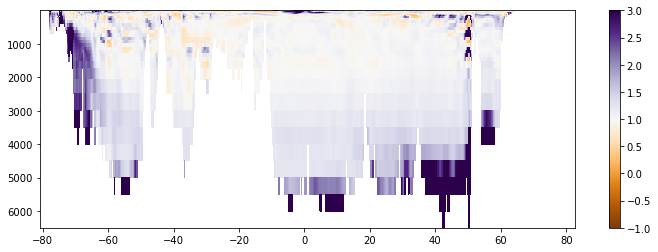

In [55]:
select = {'xh':-180}
fig,ax = plt.subplots(figsize=(12,4))
im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),
                   ds['z_l'],
                   b.sel(select,method='nearest').transpose(),
                   vmin=-1,vmax=3,cmap='PuOr')
plt.colorbar(im,ax=ax)
ax.invert_yaxis()

<ipython-input-51-927c4415ce7f>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),


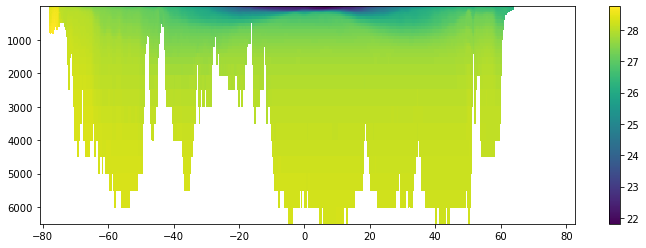

In [51]:
select = {'xh':-180}
fig,ax = plt.subplots(figsize=(12,4))
im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),
           ds['z_l'],
           ds['g'].sel(select,method='nearest').transpose())
ax.invert_yaxis()
plt.colorbar(im,ax=ax)